<font size="5">Prediction of heart disease based on patient characteristics proposal</font>


DSCI 100 section 010 group 22:  Emily Chen, Mehakpreet Dhaliwal, Haoxi Jiang, Manika Mohinani. 


<font size="4"> Introduction: </font>

Heart disease, a term used to refer to several types of heart conditions, is one of the leading causes of death worldwide. Various factors, including lifestyle, genetic predisposition, age, and sex, can influence an individual’s likelihood of developing heart disease. By understanding the intricate interplay between these different contributors, global healthcare agencies can work towards the creation and improvement of early detection and prevention strategies. Through this project, we aim to address the question “Can we create a model to predict whether an individual is likely to have heart disease based on sex and family history of coronary artery disease?” Using the dataset ‘Heart Disease’ provided by ‘UC Irvine Machine Learning Repository’, we will analyse the columns: sex, age, and family history to conduct our data analysis. 


<font size="4"> Research Question: Can we create a model to predict whether an individual is likely to have heart disease based on sex and maximum heart rate achieved? 
 </font>

The data set that we are going to use for this project is the heart disease data set provided by the course Canvas. More specifically, we are using the processed cleveland data set. 

<font size="4"> Preliminary exploratory data analysis: </font>

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
url <- "https://archive.ics.uci.edu/static/public/45/heart+disease.zip"

In [3]:
destination_dir <- "heart_disease_dataset"

In [4]:
download.file(url, destfile = "heart_disease.zip", mode = "wb")

In [5]:
unzip("heart_disease.zip", exdir = destination_dir)

In [6]:
list.files(destination_dir)

[1] "ask-detrano"                "bak"                       
 [3] "cleve.mod"                  "cleveland.data"            
 [5] "costs"                      "heart-disease.names"       
 [7] "hungarian.data"             "Index"                     
 [9] "long-beach-va.data"         "new.data"                  
[11] "processed.cleveland.data"   "processed.hungarian.data"  
[13] "processed.switzerland.data" "processed.va.data"         
[15] "reprocessed.hungarian.data" "switzerland.data"          
[17] "WARNING"

In [7]:
heart_data <- read.csv(file.path(destination_dir, "processed.cleveland.data"), header = FALSE, na.strings = c("", "?"))
heart_data

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
63,1,4,130,254,0,2,147,0,1.4,2,1,7,2


In [8]:
column_names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target")

In [9]:
heart_data <- read.csv(file.path(destination_dir, "processed.cleveland.data"), header = FALSE, col.names = column_names, na.strings = c("", "?", "NA"))
heart_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
63,1,4,130,254,0,2,147,0,1.4,2,1,7,2


In [10]:
heart_data_clean <- heart_data |>
mutate_all(as.numeric) |>
na.omit()

heart_data_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
7,62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
8,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
9,63,1,4,130,254,0,2,147,0,1.4,2,1,7,2


In [11]:
set.seed(123)
heart_disease_split <- initial_split(heart_data_clean, prop = 0.75, strata = target)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

In [12]:
table_data <- heart_disease_train |>
select("sex", "thalach", "target")


heart_disease_table_1 <- table_data |>
group_by(target) |>
summarise(mean_thalach = mean(thalach), 
          mean_sex = mean(sex))
heart_disease_table_1

target,mean_thalach,mean_sex
<dbl>,<dbl>,<dbl>
0,157.7731,0.5798319
1,147.6000,0.7750000
2,133.0741,0.8148148
3,134.1538,0.7692308
4,138.9000,0.8000000


In [13]:
heart_disease_table_2 <- table_data |> 
group_by(target) |>
summarise(n_obs = n())
heart_disease_table_2

target,n_obs
<dbl>,<int>
0,119
1,40
2,27
3,26
4,10


In [14]:
heart_disease_table_3 <- table_data |>
group_by(target) |>
summarise(across(c(sex, thalach), ~ sum(is.na(.))))

heart_disease_table_3

target,sex,thalach
<dbl>,<int>,<int>
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


`summarise()` has grouped output by 'sex'. You can override using the `.groups`
argument.


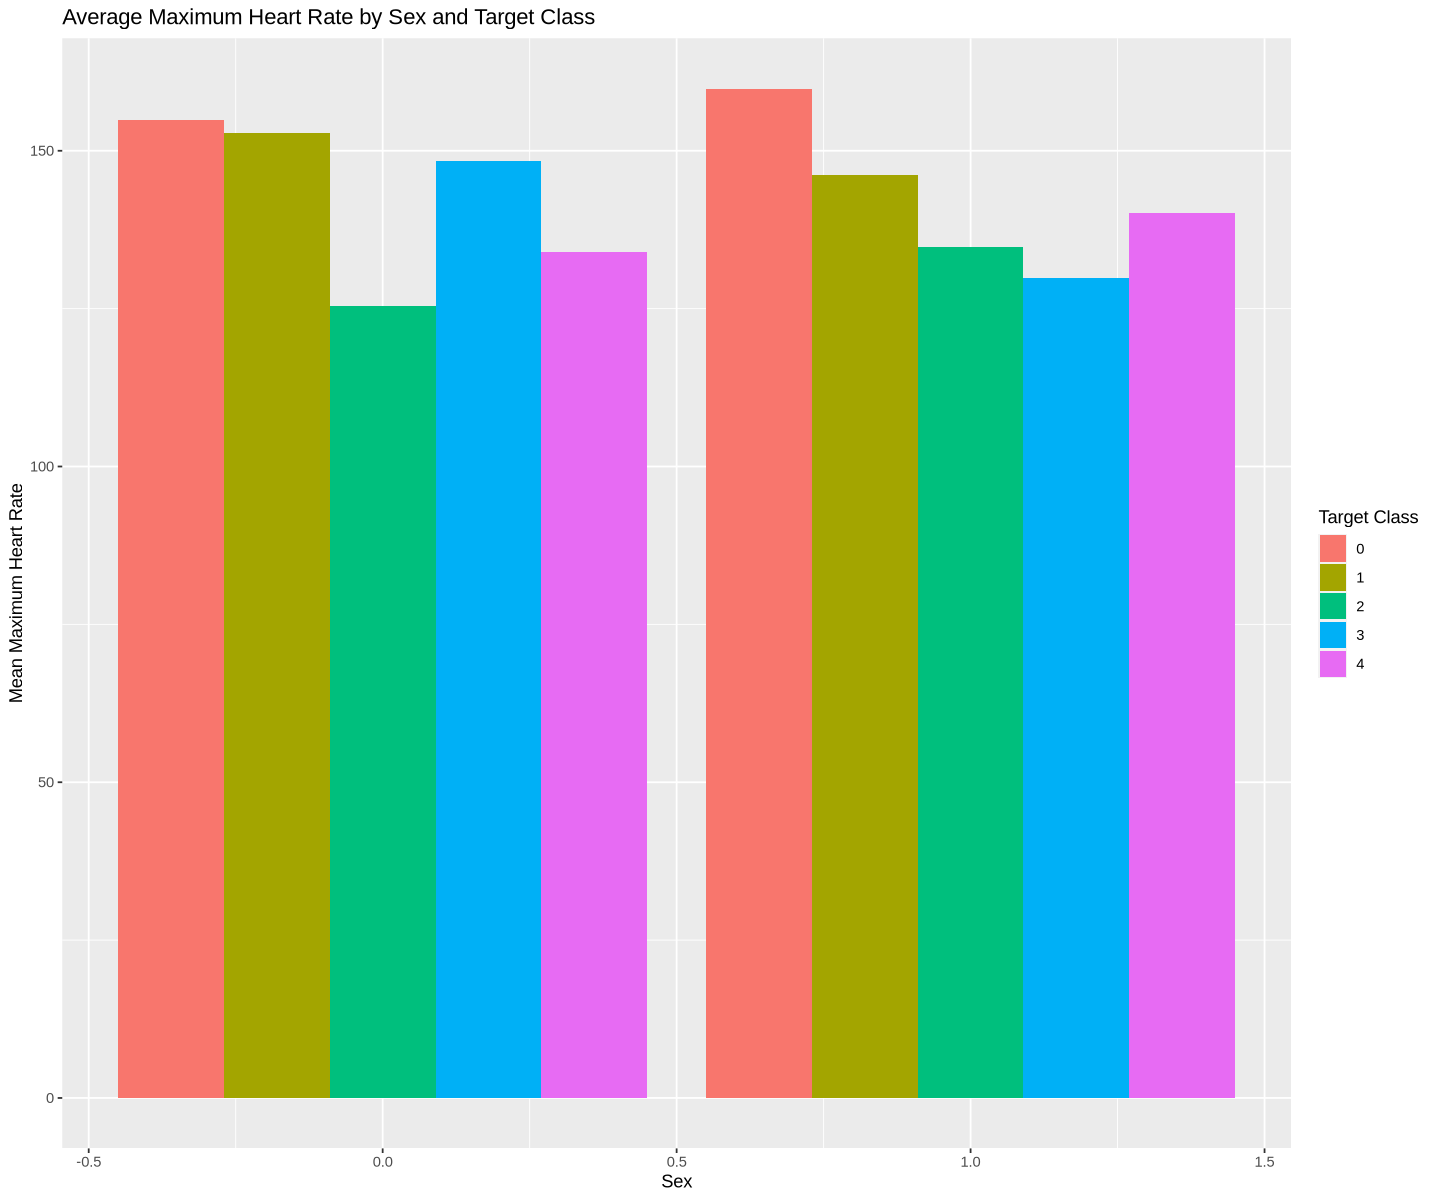

In [15]:
graph_data <- table_data |>
  group_by(sex, target) |>
  summarise(mean_thalach = mean(thalach))

options(repr.plot.width = 12, repr.plot.height = 10)

heart_disease_plot <- ggplot(graph_data, aes(x = sex, y = mean_thalach, fill = factor(target))) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Average Maximum Heart Rate by Sex and Target Class",
       x = "Sex",
       y = "Mean Maximum Heart Rate",
       fill = "Target Class")

heart_disease_plot

<font size="4"> Methods:  </font>

We plan to use K-nearest neighbor algorithm to predict and determine the type or class of heart disease using given information about the patients and evaluate the effectiveness of our model. 

<font size="4"> Expected outcomes and significance:  </font>

We expect to identify whether sex and family history of coronary artery disease are significant indicators of heart disease risk. The predictive model is expected to accurately classify individuals at risk of heart disease based on these factors. More specifically, from first glance at the given data and due to past research articles, we expect the model to present that the individual will be more likely to have heart disease given family history of coronary artery disease. The insights gained from the data analysis of the information generated can aid healthcare practitioners in identifying high risk individuals for targeted screenings 
